In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 30)

In [49]:
data = pd.read_csv('../data/data.csv')
data

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,9835075,180,DRC28679,28679,10 February 2023,2023,1,Strategic developments,Non-violent transfer of territory,M23: March 23 Movement,NaN,2,NaN,NaN,0,20,Middle Africa,Democratic Republic of Congo,Nord-Kivu,Rutshuru,Bwito,Bukombo,-1.2020,29.1183,1,Radio Okapi,National,"On 10 February 2023, M23 gained control of Buk...",0,1676309784,COD
1,9835076,180,DRC28680,28680,10 February 2023,2023,1,Protests,Excessive force against protesters,Protesters (Democratic Republic of Congo),LUCHA: Fight for Change,6,Police Forces of the Democratic Republic of Co...,NaN,1,16,Middle Africa,Democratic Republic of Congo,Nord-Kivu,Butembo,Butembo,Butembo,0.1420,29.2910,1,7 Sur 7; Politico (DRC); Twitter,New media-National,"On 10 February 2023, the police shot gunshots ...",0,1676309784,COD
2,9835077,180,DRC28681,28681,10 February 2023,2023,2,Strategic developments,Headquarters or base established,ADF: Allied Democratic Forces,NaN,2,NaN,NaN,0,20,Middle Africa,Democratic Republic of Congo,Nord-Kivu,Beni,Oicha,Mamove,0.8241,29.4412,2,Politico (DRC),National,"Around 10 February 2023 (as reported), ADF est...",0,1676309784,COD
3,9835079,180,DRC28683,28683,10 February 2023,2023,1,Battles,Armed clash,Military Forces of the Democratic Republic of ...,NaN,1,ADF: Allied Democratic Forces,NaN,2,12,Middle Africa,Democratic Republic of Congo,Nord-Kivu,Beni,Ruwenzori,Kanyatsi,0.4367,29.3247,1,Mediacongo.net,National,"On 10 February 2023, FARDC clashed with ADF in...",0,1676309784,COD
4,9835080,180,DRC28684,28684,10 February 2023,2023,1,Battles,Armed clash,Military Forces of the Democratic Republic of ...,NaN,1,M23: March 23 Movement,NaN,2,12,Middle Africa,Democratic Republic of Congo,Nord-Kivu,Masisi,Bahunde,Karenga,-1.4724,29.0655,1,SOS Medias,New media,"On 10 February 2023, FARDC clashed with M23 in...",0,1676309784,COD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310560,9695770,694,SIE2,2,01 January 1997,1997,3,Battles,Government regains territory,Military Forces of Sierra Leone (1996-1997),NaN,1,RUF: Revolutionary United Front,NaN,2,12,Western Africa,Sierra Leone,Eastern,Kono,Gbane,Mandu,8.4642,-10.9332,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851,SLE
310561,9695771,694,SIE3,3,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,NaN,3,RUF: Revolutionary United Front,NaN,2,23,Western Africa,Sierra Leone,Southern,Bo,Selenga,Selenga,8.1221,-11.7047,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851,SLE
310562,9695772,694,SIE6,6,01 January 1997,1997,3,Violence against civilians,Attack,Military Forces of Sierra Leone (1996-1997),NaN,1,Civilians (Sierra Leone),NaN,7,17,Western Africa,Sierra Leone,Southern,Bonthe,Imperi,York Island,7.5317,-12.4694,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851,SLE
310563,9695773,694,SIE7,7,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,NaN,3,Military Forces of Sierra Leone (1996-1997),NaN,1,13,Western Africa,Sierra Leone,Southern,Moyamba,Fakunya,Fakunya,8.2310,-12.3380,2,SL-LED; No Peace Without Justice,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851,SLE


In [50]:
col_event = data.columns[7:16]
print(col_event)
data[col_event].head()

Index(['event_type', 'sub_event_type', 'actor1', 'assoc_actor_1', 'inter1',
       'actor2', 'assoc_actor_2', 'inter2', 'interaction'],
      dtype='object')


,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction
0,Strategic developments,Non-violent transfer of territory,M23: March 23 Movement,NaN,2,NaN,NaN,0,20
1,Protests,Excessive force against protesters,Protesters (Democratic Republic of Congo),LUCHA: Fight for Change,6,Police Forces of the Democratic Republic of Co...,NaN,1,16
2,Strategic developments,Headquarters or base established,ADF: Allied Democratic Forces,NaN,2,NaN,NaN,0,20
3,Battles,Armed clash,Military Forces of the Democratic Republic of ...,NaN,1,ADF: Allied Democratic Forces,NaN,2,12
4,Battles,Armed clash,Military Forces of the Democratic Republic of ...,NaN,1,M23: March 23 Movement,NaN,2,12


## Missing Pattern

In [51]:
data[col_event].isnull().sum()

event_type             0
sub_event_type         0
actor1                 0
assoc_actor_1     228725
inter1                 0
actor2             84411
assoc_actor_2     249727
inter2                 0
interaction            0
dtype: int64

In [52]:
data[col_event].describe(include='all')

,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction
count,310565,310565,310565,81840,310565.000000,226154,60838,310565.000000,310565.000000
unique,6,25,5342,9446,NaN,4714,9925,NaN,NaN
top,Battles,Armed clash,Al Shabaab,Pastoralists (Nigeria),NaN,Civilians (Nigeria),Women (Democratic Republic of Congo),NaN,NaN
freq,79690,73561,11378,1882,NaN,11722,964,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.565044,NaN,NaN,3.236504,33.952702
std,NaN,NaN,NaN,NaN,1.996343,NaN,NaN,2.998914,18.830490
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,10.000000
25%,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,15.000000
50%,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,2.000000,33.000000
75%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,7.000000,55.000000


## Event Types 

In [53]:
def agg_func_event(x):
    total_1 = x['actor1'].count()
    total_2 = x['actor2'].count()
    total_11 = x['assoc_actor_1'].count()
    total_21 = x['assoc_actor_2'].count()
    col_name=['event_ctr', 'assoc_actor1_pct', 'actor_2_pct', 'assoc_actor2_pct']
    return pd.Series([total_1, total_11/total_1, total_2/total_1, total_21/total_1], index=col_name)

In [54]:
event_ctr = data.groupby(['event_type']).apply(agg_func_event).reset_index().sort_values('event_ctr')
event_ctr

,event_type,event_ctr,assoc_actor1_pct,actor_2_pct,assoc_actor2_pct
1,Explosions/Remote violence,22926.0,0.047544,0.902382,0.125229
4,Strategic developments,23441.0,0.154174,0.622328,0.200674
3,Riots,34086.0,0.537288,0.708238,0.220413
2,Protests,73290.0,0.571497,0.135284,0.024082
5,Violence against civilians,77132.0,0.098156,1.000000,0.453768
0,Battles,79690.0,0.117530,1.000000,0.112749


In [55]:
order_event = pd.CategoricalDtype(categories=event_ctr['event_type'], ordered=True)
sub_event_ctr = data.groupby(['event_type', 'sub_event_type']).apply(agg_func_event).reset_index()
sub_event_ctr['event_type'] = pd.Series(sub_event_ctr['event_type'], dtype=order_event)
sub_event_ctr = sub_event_ctr.sort_values('event_type')
sub_event_ctr

,event_type,sub_event_type,event_ctr,assoc_actor1_pct,actor_2_pct,assoc_actor2_pct
3,Explosions/Remote violence,Air/drone strike,6263.0,0.067061,0.906914,0.103624
4,Explosions/Remote violence,Chemical weapon,22.0,0.136364,0.954545,0.090909
5,Explosions/Remote violence,Grenade,2714.0,0.015844,0.962049,0.150700
6,Explosions/Remote violence,Remote explosive/landmine/IED,9138.0,0.036441,0.909170,0.128475
7,Explosions/Remote violence,Shelling/artillery/missile attack,4038.0,0.066617,0.822437,0.115651
8,Explosions/Remote violence,Suicide bomb,751.0,0.029294,0.994674,0.226365
19,Strategic developments,Looting/property destruction,8442.0,0.125681,0.908908,0.364250
17,Strategic developments,Disrupted weapons use,1730.0,0.060694,0.738150,0.050289
21,Strategic developments,Other,2424.0,0.274752,0.429868,0.167492
18,Strategic developments,Headquarters or base established,943.0,0.200424,0.002121,0.001060


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Air/drone strike'),
  Text(1, 0, 'Chemical weapon'),
  Text(2, 0, 'Grenade'),
  Text(3, 0, 'Remote explosive/landmine/IED'),
  Text(4, 0, 'Shelling/artillery/missile attack'),
  Text(5, 0, 'Suicide bomb'),
  Text(6, 0, 'Looting/property destruction'),
  Text(7, 0, 'Disrupted weapons use'),
  Text(8, 0, 'Other'),
  Text(9, 0, 'Headquarters or base established'),
  Text(10, 0, 'Change to group/activity'),
  Text(11, 0, 'Arrests'),
  Text(12, 0, 'Non-violent transfer of territory'),
  Text(13, 0, 'Agreement'),
  Text(14, 0, 'Mob violence'),
  Text(15, 0, 'Violent demonstration'),
  Text(16, 0, 'Protest with intervention'),
  Text(17, 0, 'Peaceful protest'),
  Text(18, 0, 'Excessive force against protesters'),
  Text(19, 0, 'Abduction/forced disappearance'),
  Text(20, 0, 'Sexual violence'),
  Text(21, 0, 'Attack'),
  Text(22, 0, 'Non-state actor overtakes ter

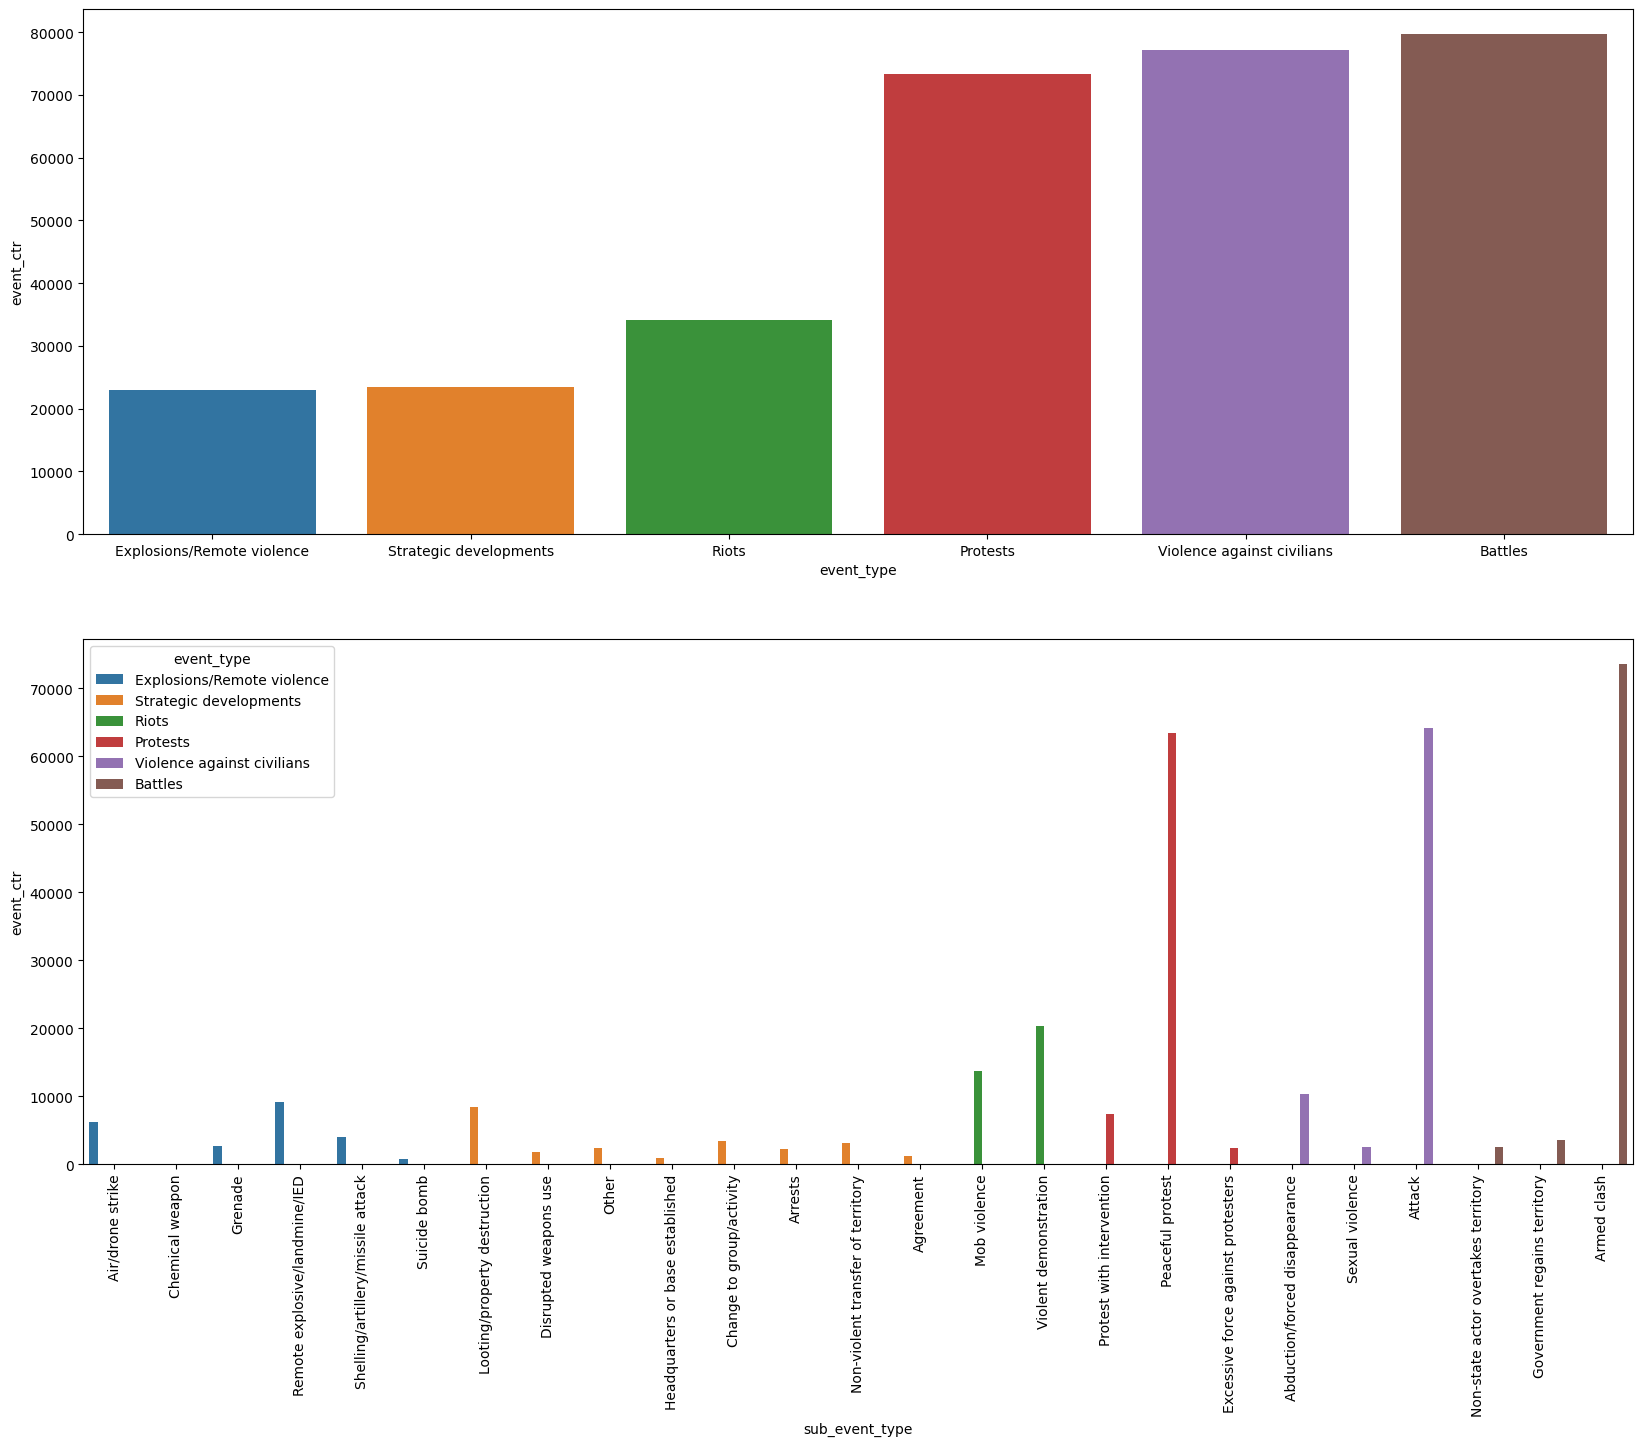

In [56]:
fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(data=event_ctr, x = 'event_type', y='event_ctr', ax=ax[0])
plt.xticks(rotation=90)

sns.barplot(data=sub_event_ctr, x='sub_event_type', y='event_ctr', hue='event_type', ax=ax[1])
plt.xticks(rotation=90)

Missing pattern associated with each event type

In [57]:
event_pct_stack = event_ctr.iloc[:,[0,2,3,4]].set_index('event_type').unstack().reset_index()
event_pct_stack.columns = ['item', 'event_type', 'pct']

<AxesSubplot:xlabel='item', ylabel='pct'>

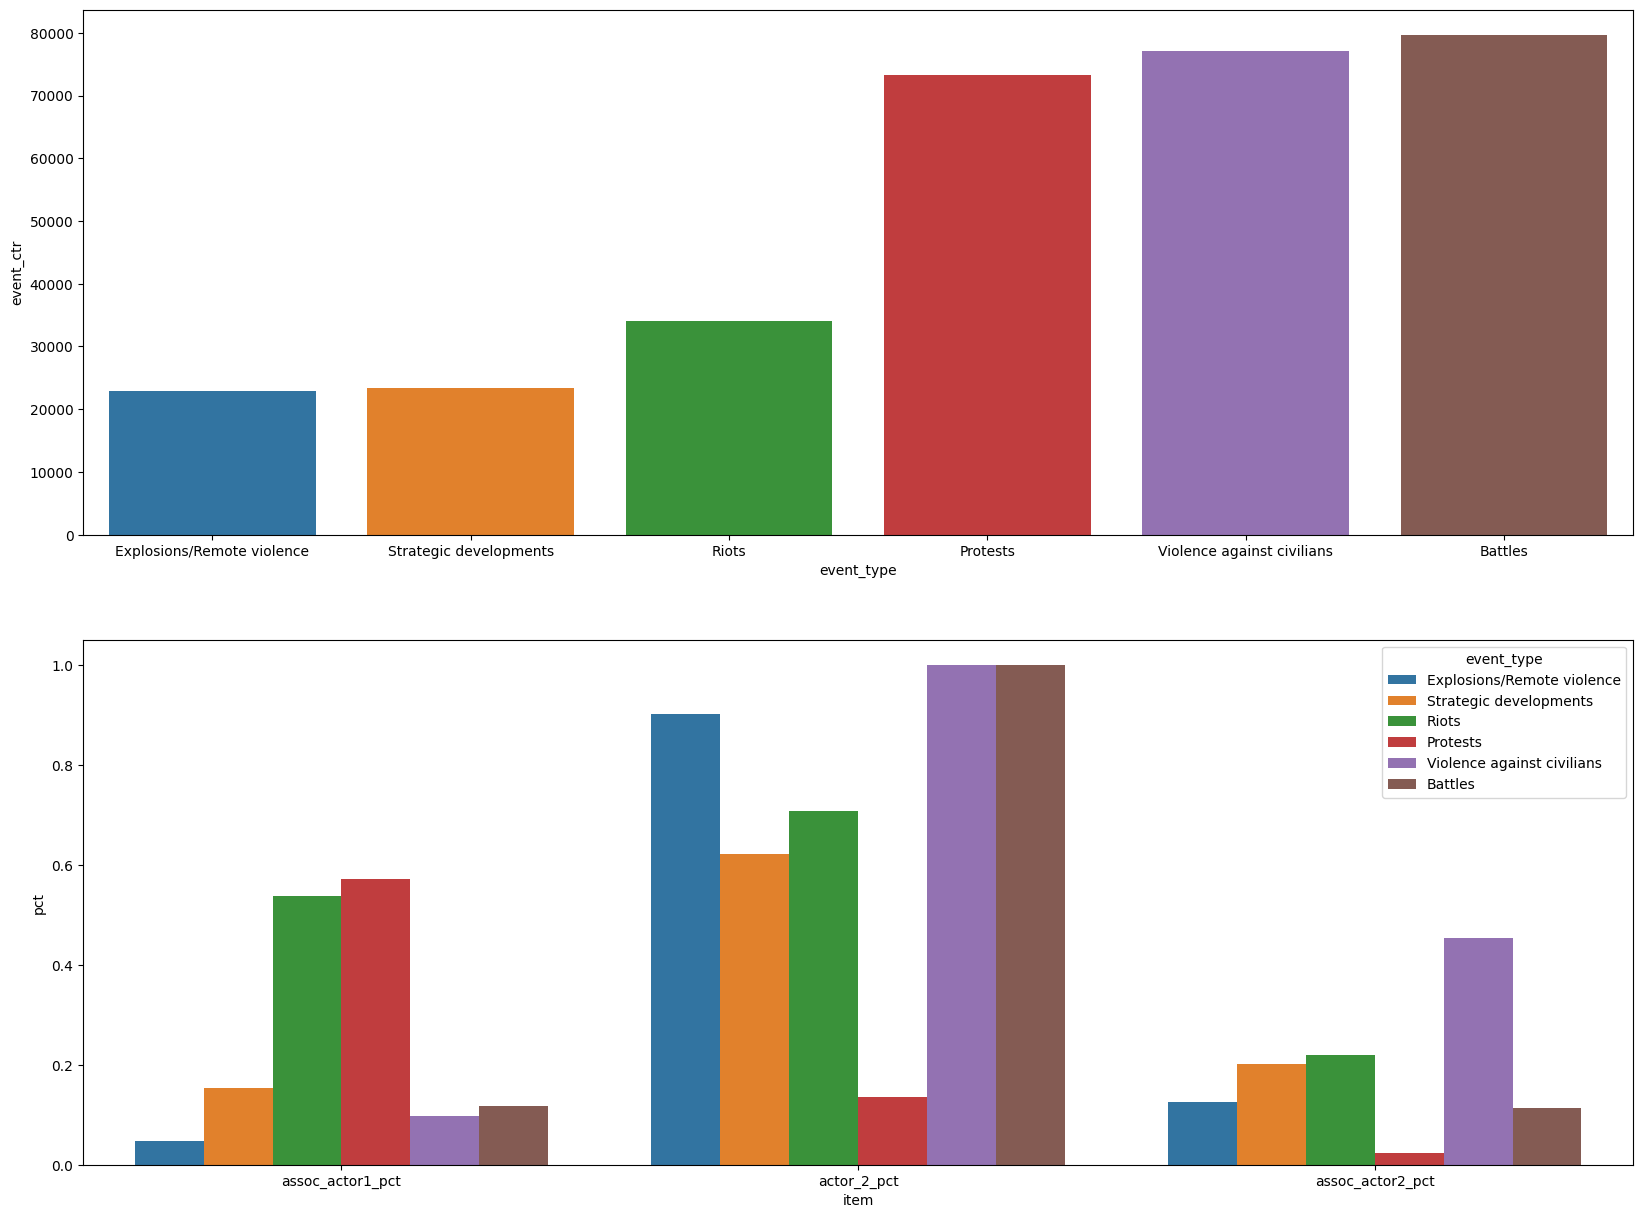

In [58]:
fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(data=event_ctr, x = 'event_type', y='event_ctr', ax=ax[0])
sns.barplot(data=event_pct_stack, x='item', y='pct', hue='event_type')


## Actor1

ACLED recognizes a range of actors including state forces, rebels, militias, identity groups, demonstrators, civilians, and external and other forces.

The name of each actor is noted in the 'actor1' and 'actor2' columns. The group type is recorded in the 'inter1' and 'inter2' columns

| Inter Code      | Description | Main Exposure | 
| ----------- | ----------- | ----------- | 
| 1 | State Forces        |  Battles | 
| 2 | Rebel Groups        |  Battles | 
| 3 | Political Militias  |  Violence |
| 4 | Identity Militias   |  Violence & Battles | 
| 5 | Rioters |  Riots | 
| 6 | Protesters | Protesters | 
| 7 | Civilians | Strategy | 
| 8 | Exteranl / Other Forces | Several |

Interaction code is the combination of the two 'inter' codes associated with the two main actors. E.g., if a country's military fights a political militia group, the respective 'inter1' and 'inter2' codes are '1' and '3', the compounded interaction is recorded as '13'. For one sided events, the empty second actor category is coded as '0'

                    event_type  inter1  event_ctr
0                      Battles       1      32519
1                      Battles       2      19079
2                      Battles       3      14630
3                      Battles       4       9777
4                      Battles       8       3685
..                         ...     ...        ...
31  Violence against civilians       3      34375
32  Violence against civilians       2      16685
33  Violence against civilians       1      13911
34  Violence against civilians       4      11079
35  Violence against civilians       8       1082

[36 rows x 3 columns]


<AxesSubplot:xlabel='inter1', ylabel='event_ctr'>

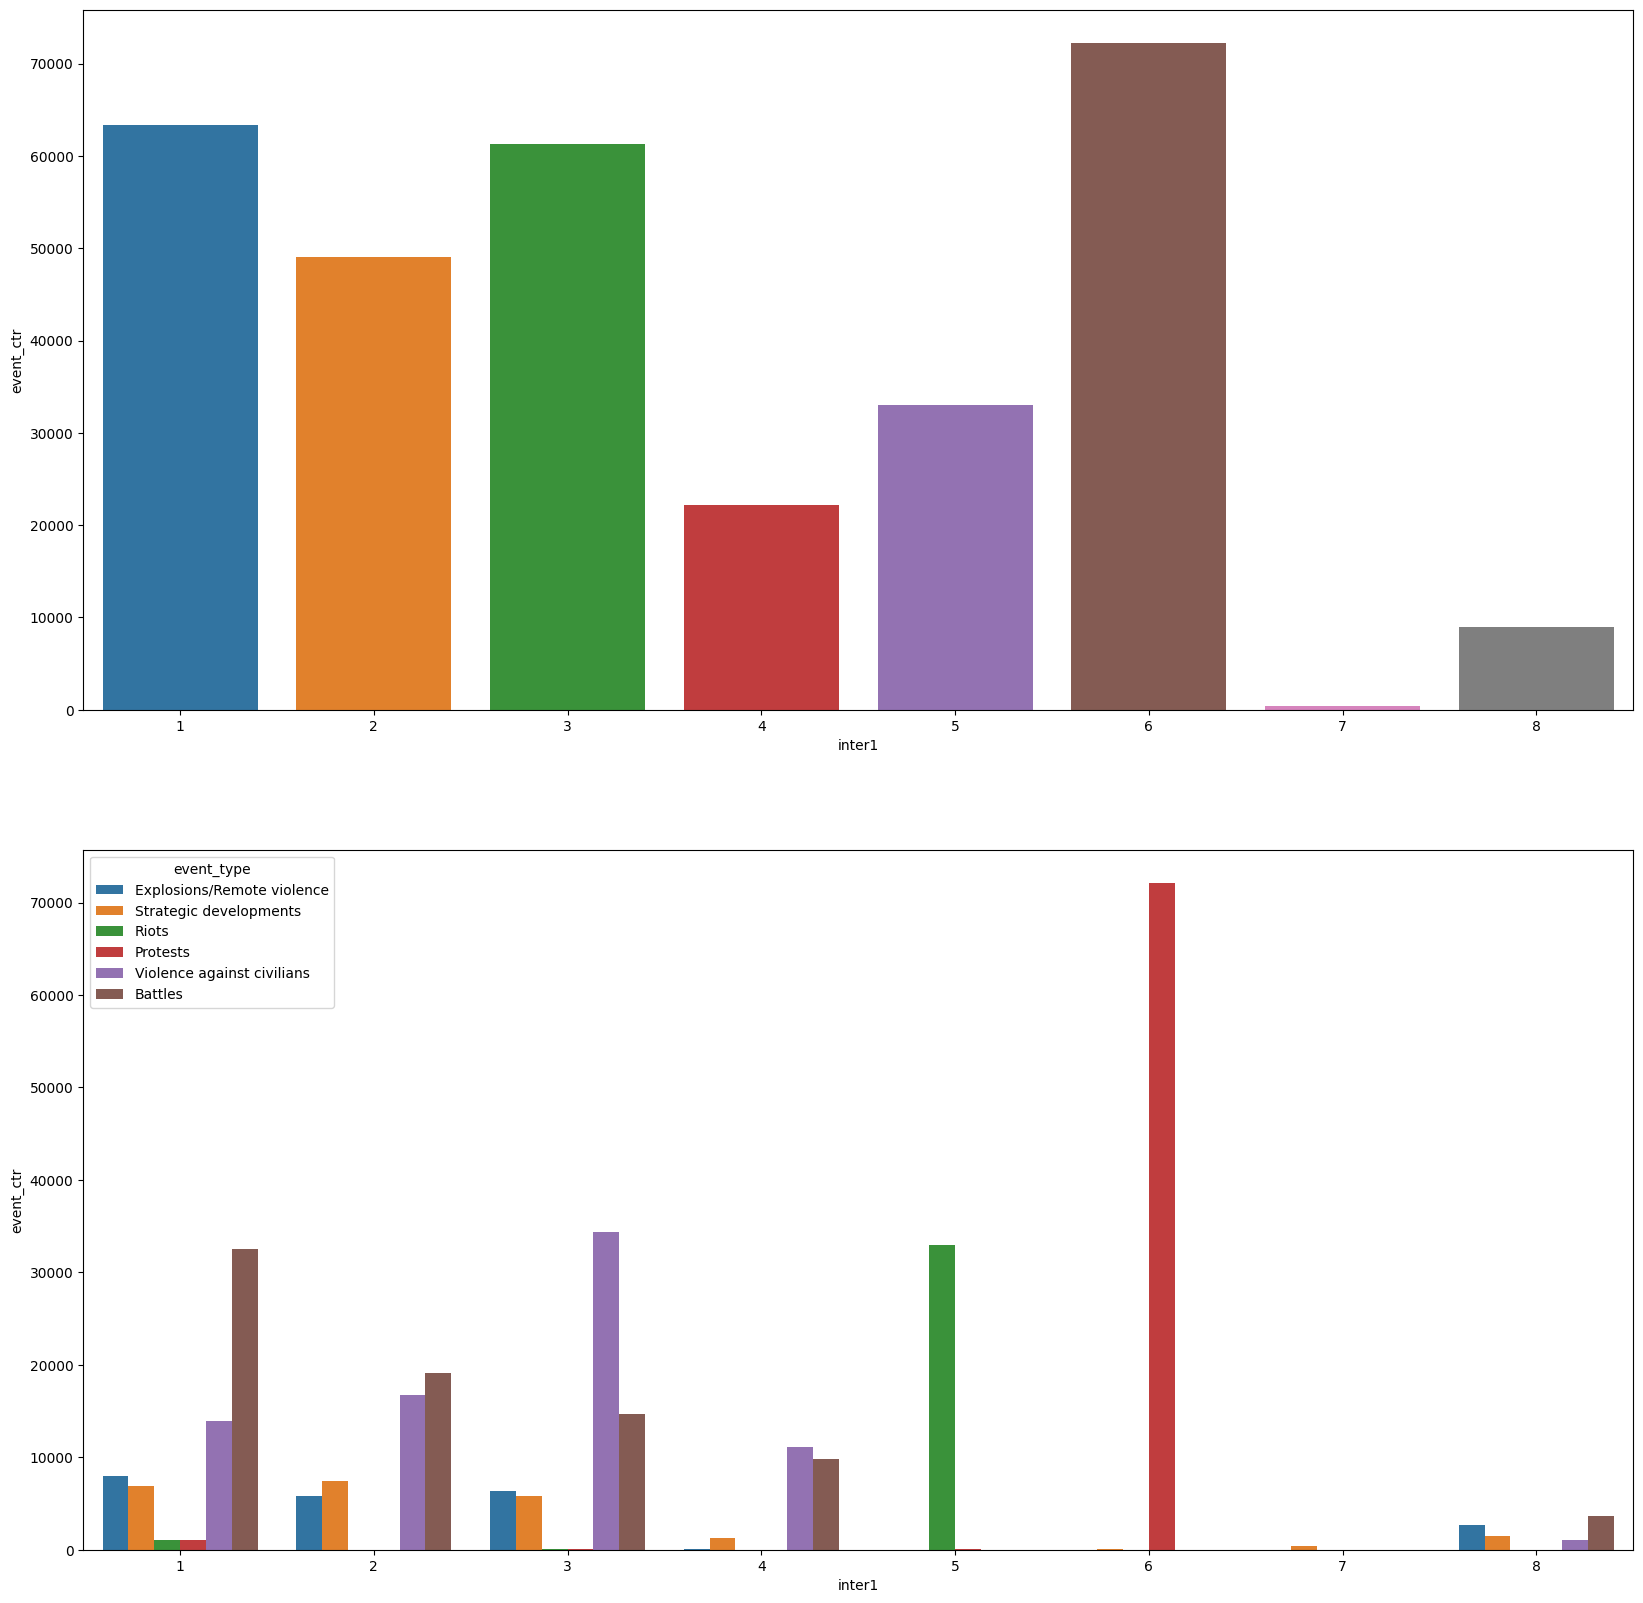

In [86]:
event_inter1 = pd.DataFrame(data.groupby('event_type').apply(lambda x: x['inter1'].value_counts())).reset_index()
event_inter1['event_type'] = pd.Series(event_inter1['event_type'], dtype=order_event)
event_inter1.sort_values('event_type')
event_inter1.columns = ['event_type', 'inter1', 'event_ctr']
print(event_inter1)

fig, ax = plt.subplots(2, 1, figsize=(20, 20))
sns.barplot(data = event_inter1.groupby('inter1')['event_ctr'].sum().reset_index(), x='inter1', y='event_ctr', ax=ax[0])
sns.barplot(data = event_inter1, x='inter1', y='event_ctr', hue='event_type', ax=ax[1])

In [59]:
data.loc[data.event_type == 'Protests', col_event].tail(20)

,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction
310318,Protests,Protest with intervention,Protesters (Burkina Faso),Students (Burkina Faso),6,Police Forces of Burkina Faso (1987-2014),NaN,1,16
310356,Protests,Peaceful protest,Protesters (Kenya),Catholic Christian Group (Kenya),6,NaN,NaN,0,60
310358,Protests,Peaceful protest,Protesters (Niger),FRDD: Front for the Restoration and Defence of...,6,NaN,NaN,0,60
310379,Protests,Peaceful protest,Protesters (Ivory Coast),FESCI: Student Federation of Ivory Coast; Stud...,6,NaN,NaN,0,60
310389,Protests,Peaceful protest,Protesters (Sudan),NaN,6,NaN,NaN,0,60
310391,Protests,Peaceful protest,Protesters (Ivory Coast),FESCI: Student Federation of Ivory Coast; Stud...,6,NaN,NaN,0,60
310393,Protests,Protest with intervention,Protesters (Togo),Students (Togo),6,Police Forces of Togo (1967-2005),NaN,1,16
310395,Protests,Protest with intervention,Police Forces of the Ivory Coast (1993-1999),NaN,1,Protesters (Ivory Coast),COJEP: Young Patriots; Students (Ivory Coast),6,16
310408,Protests,Peaceful protest,Protesters (Niger),FRDD: Front for the Restoration and Defence of...,6,NaN,NaN,0,60
310419,Protests,Protest with intervention,Protesters (Sudan),NaN,6,Police Forces of Sudan (1989-2019),NaN,1,16


## Actor2

If an event has two actors, both 'inter1' and 'inter2' are recorded. If an event has only one actor, 'inter1' is recorded along with a 0 value for 'inter2'. The interaction codes refer to the main actors and not the associated actors.

| Inter Code      | Description | Main Exposure | 
| ----------- | ----------- | ----------- | 
| 0 | Missing |  |
| 1 | State Forces        |  Battles | 
| 2 | Rebel Groups        |  Battles | 
| 3 | Political Militias  |  Battles |
| 4 | Identity Militias   |  Battles | 
| 5 | Rioters |  Riots | 
| 6 | Protesters | Protesters | 
| 7 | Civilians | Violence | 
| 8 | Exteranl / Other Forces | Battle |

                    event_type  inter2  event_ctr
0                      Battles       1      26574
1                      Battles       2      23464
2                      Battles       3      14894
3                      Battles       4      11240
4                      Battles       8       3518
..                         ...     ...        ...
34      Strategic developments       3       1401
35      Strategic developments       4        274
36      Strategic developments       8        260
37      Strategic developments       6          2
38  Violence against civilians       7      77132

[39 rows x 3 columns]


<AxesSubplot:xlabel='inter2', ylabel='event_ctr'>

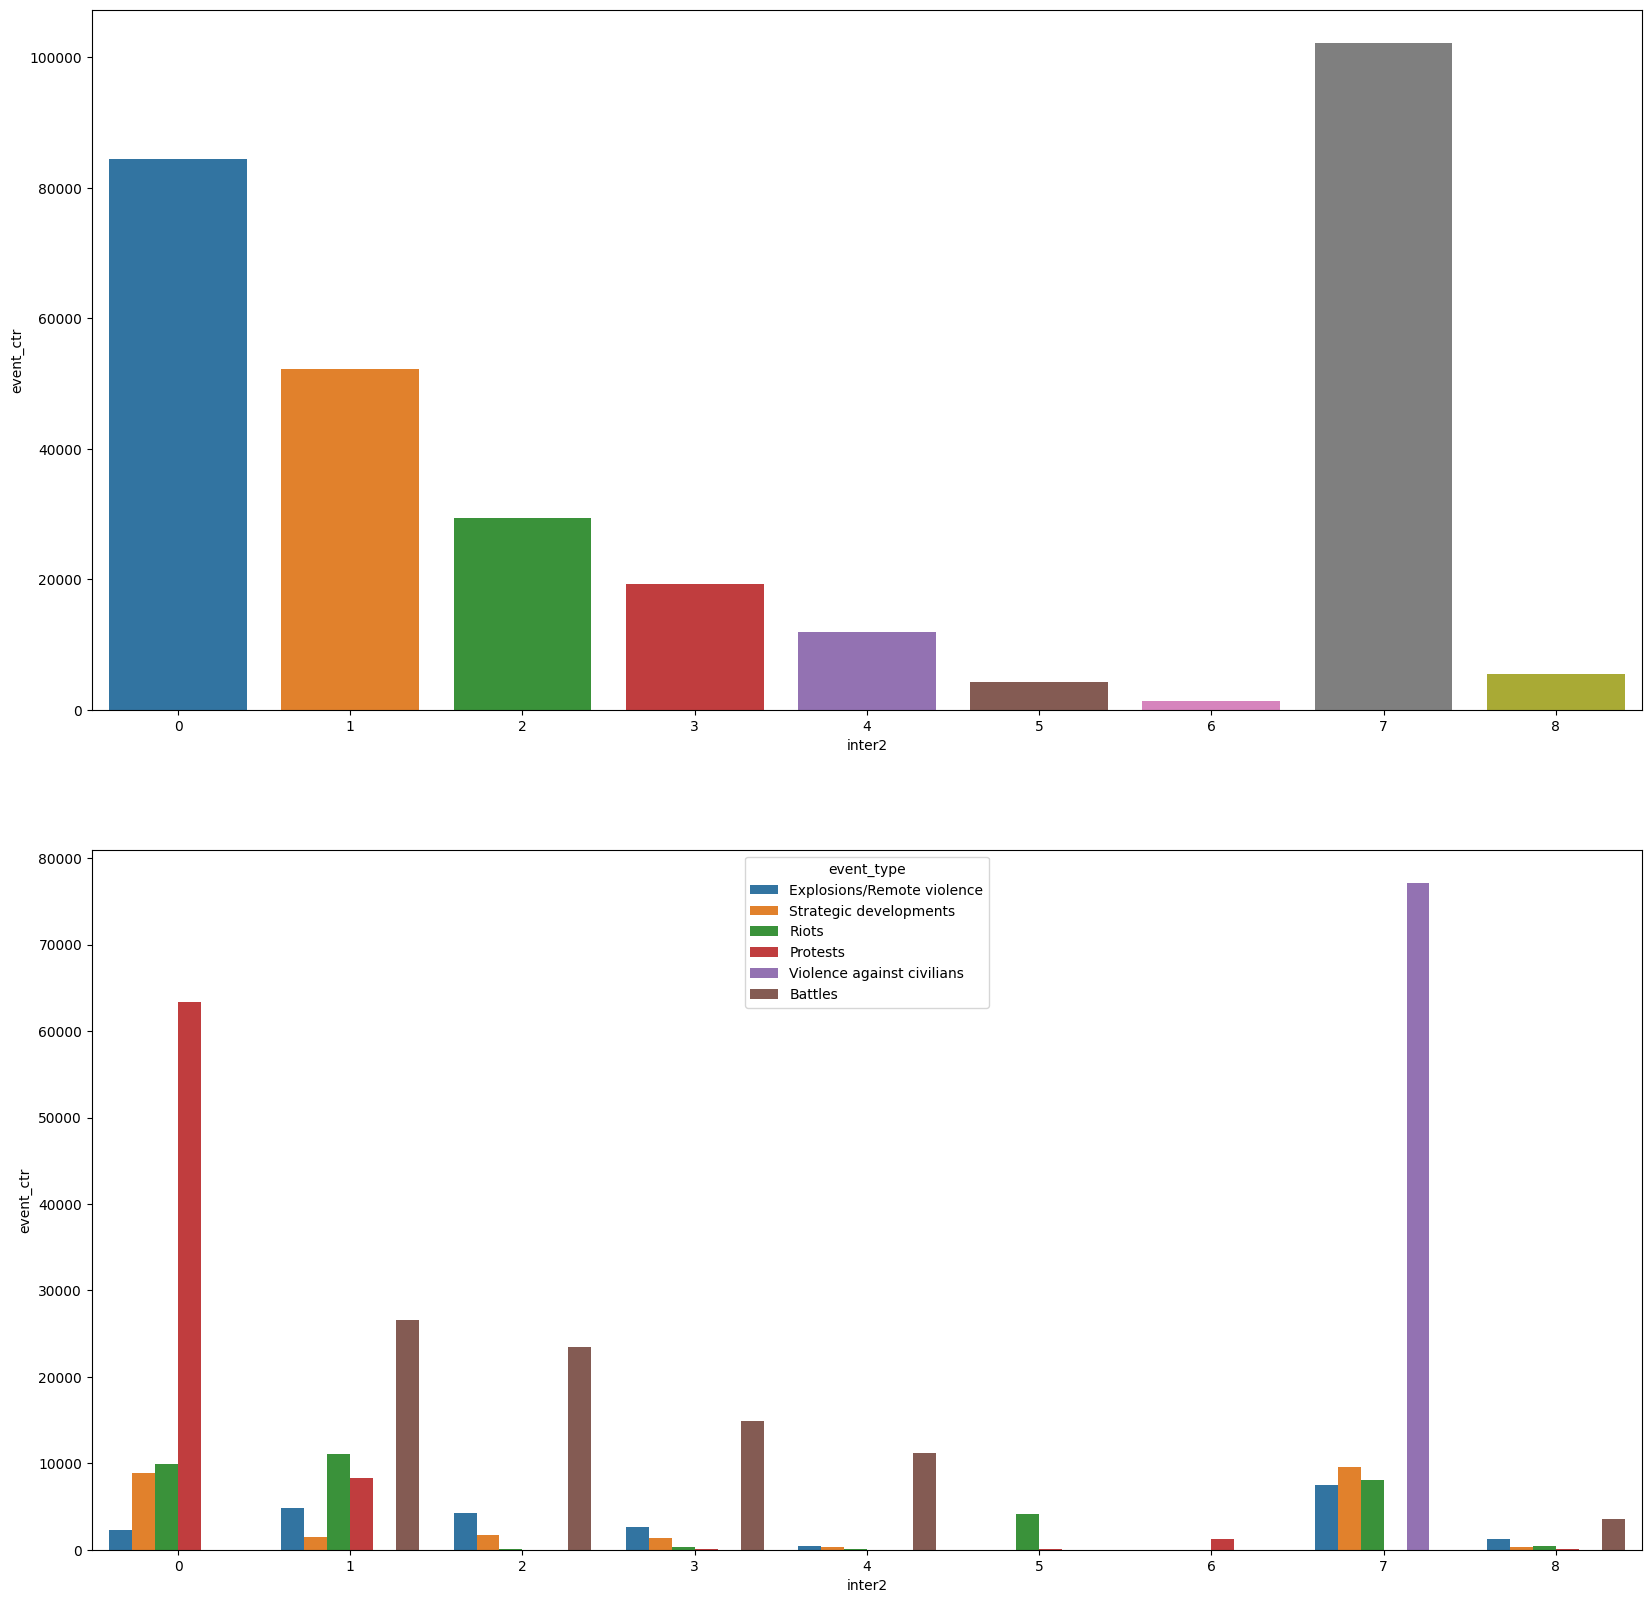

In [87]:
event_inter2 = pd.DataFrame(data.groupby('event_type').apply(lambda x: x['inter2'].value_counts())).reset_index()
event_inter2['event_type'] = pd.Series(event_inter2['event_type'], dtype=order_event)
event_inter2.sort_values('event_type')
event_inter2.columns = ['event_type', 'inter2', 'event_ctr']
print(event_inter2)

fig, ax = plt.subplots(2, 1, figsize=(20, 20))
sns.barplot(data = event_inter2.groupby('inter2')['event_ctr'].sum().reset_index(), x='inter2', y='event_ctr', ax=ax[0])
sns.barplot(data = event_inter2, x='inter2', y='event_ctr', hue='event_type', ax=ax[1])

## Interaction

<AxesSubplot:xlabel='interaction', ylabel='actor1'>

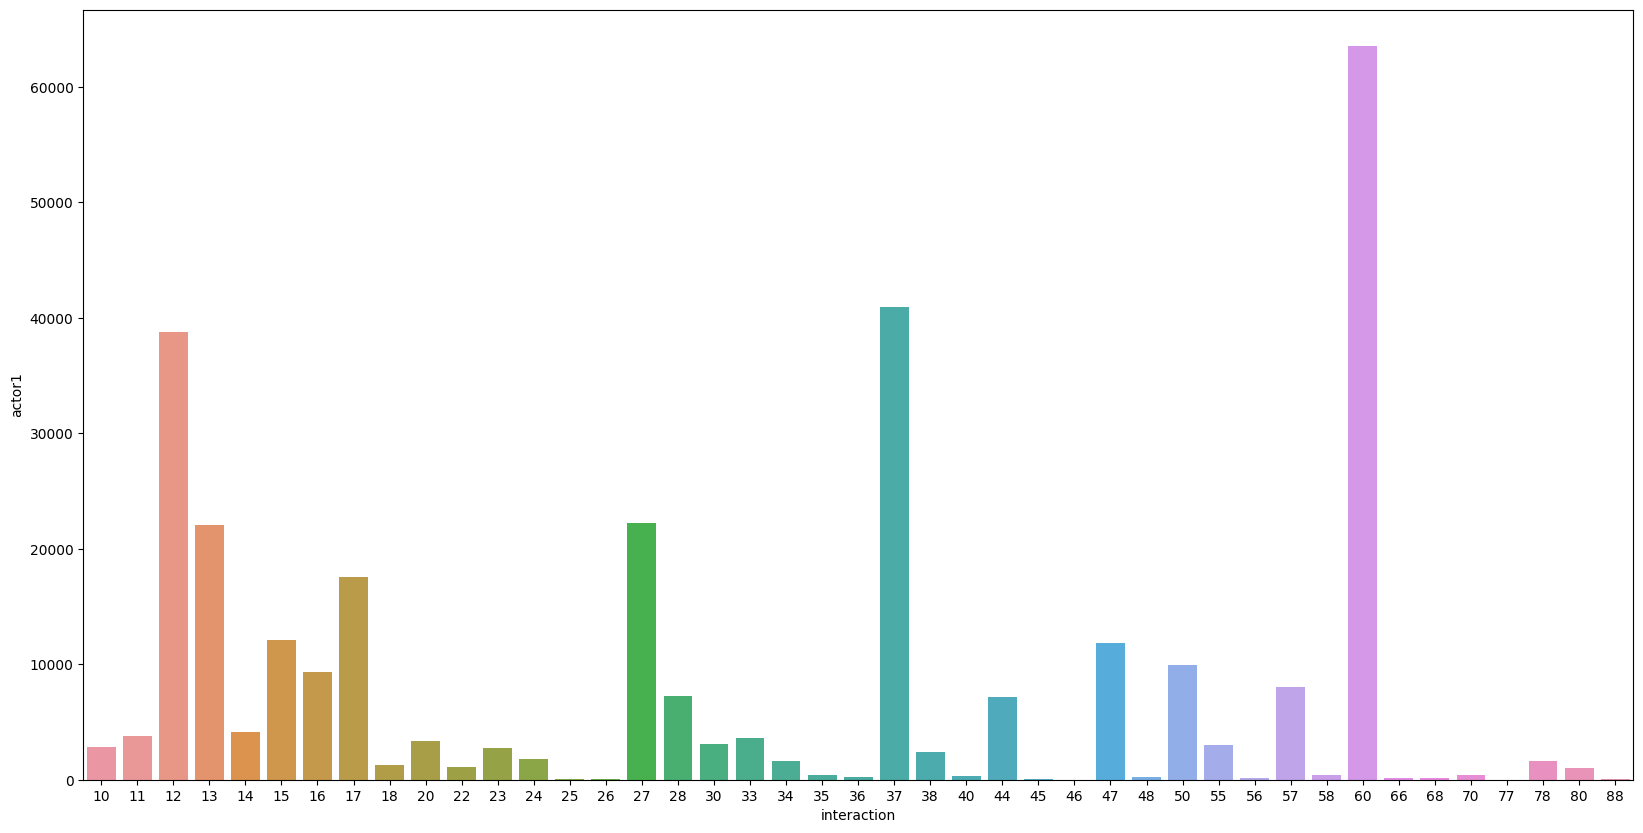

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
interaction_ctr = data.groupby('interaction')['actor1'].count().sort_values().reset_index()
sns.barplot(data = interaction_ctr, x='interaction', y='actor1')
